## MULTIPLE LINEAR REGRESSION -

### Taskes:



- Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

- Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

- Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models

- Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

- Apply Lasso and Ridge methods on the model.

## Performing EDA -

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data=pd.read_csv('ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
data.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [4]:
#convert catagorical data into dummy variable
data=pd.get_dummies(data, 'Fuel_Type', drop_first=True)

In [5]:
data.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198,0.054084,-0.038516
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253,-0.097740,0.092611
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598,0.403060,-0.433160
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614,-0.533453,0.489110
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249,-0.084490,0.080249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637,0.327723,-0.315170
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618,0.025495,-0.027589
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613,-0.048847,0.063182
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000,0.568087,-0.560470


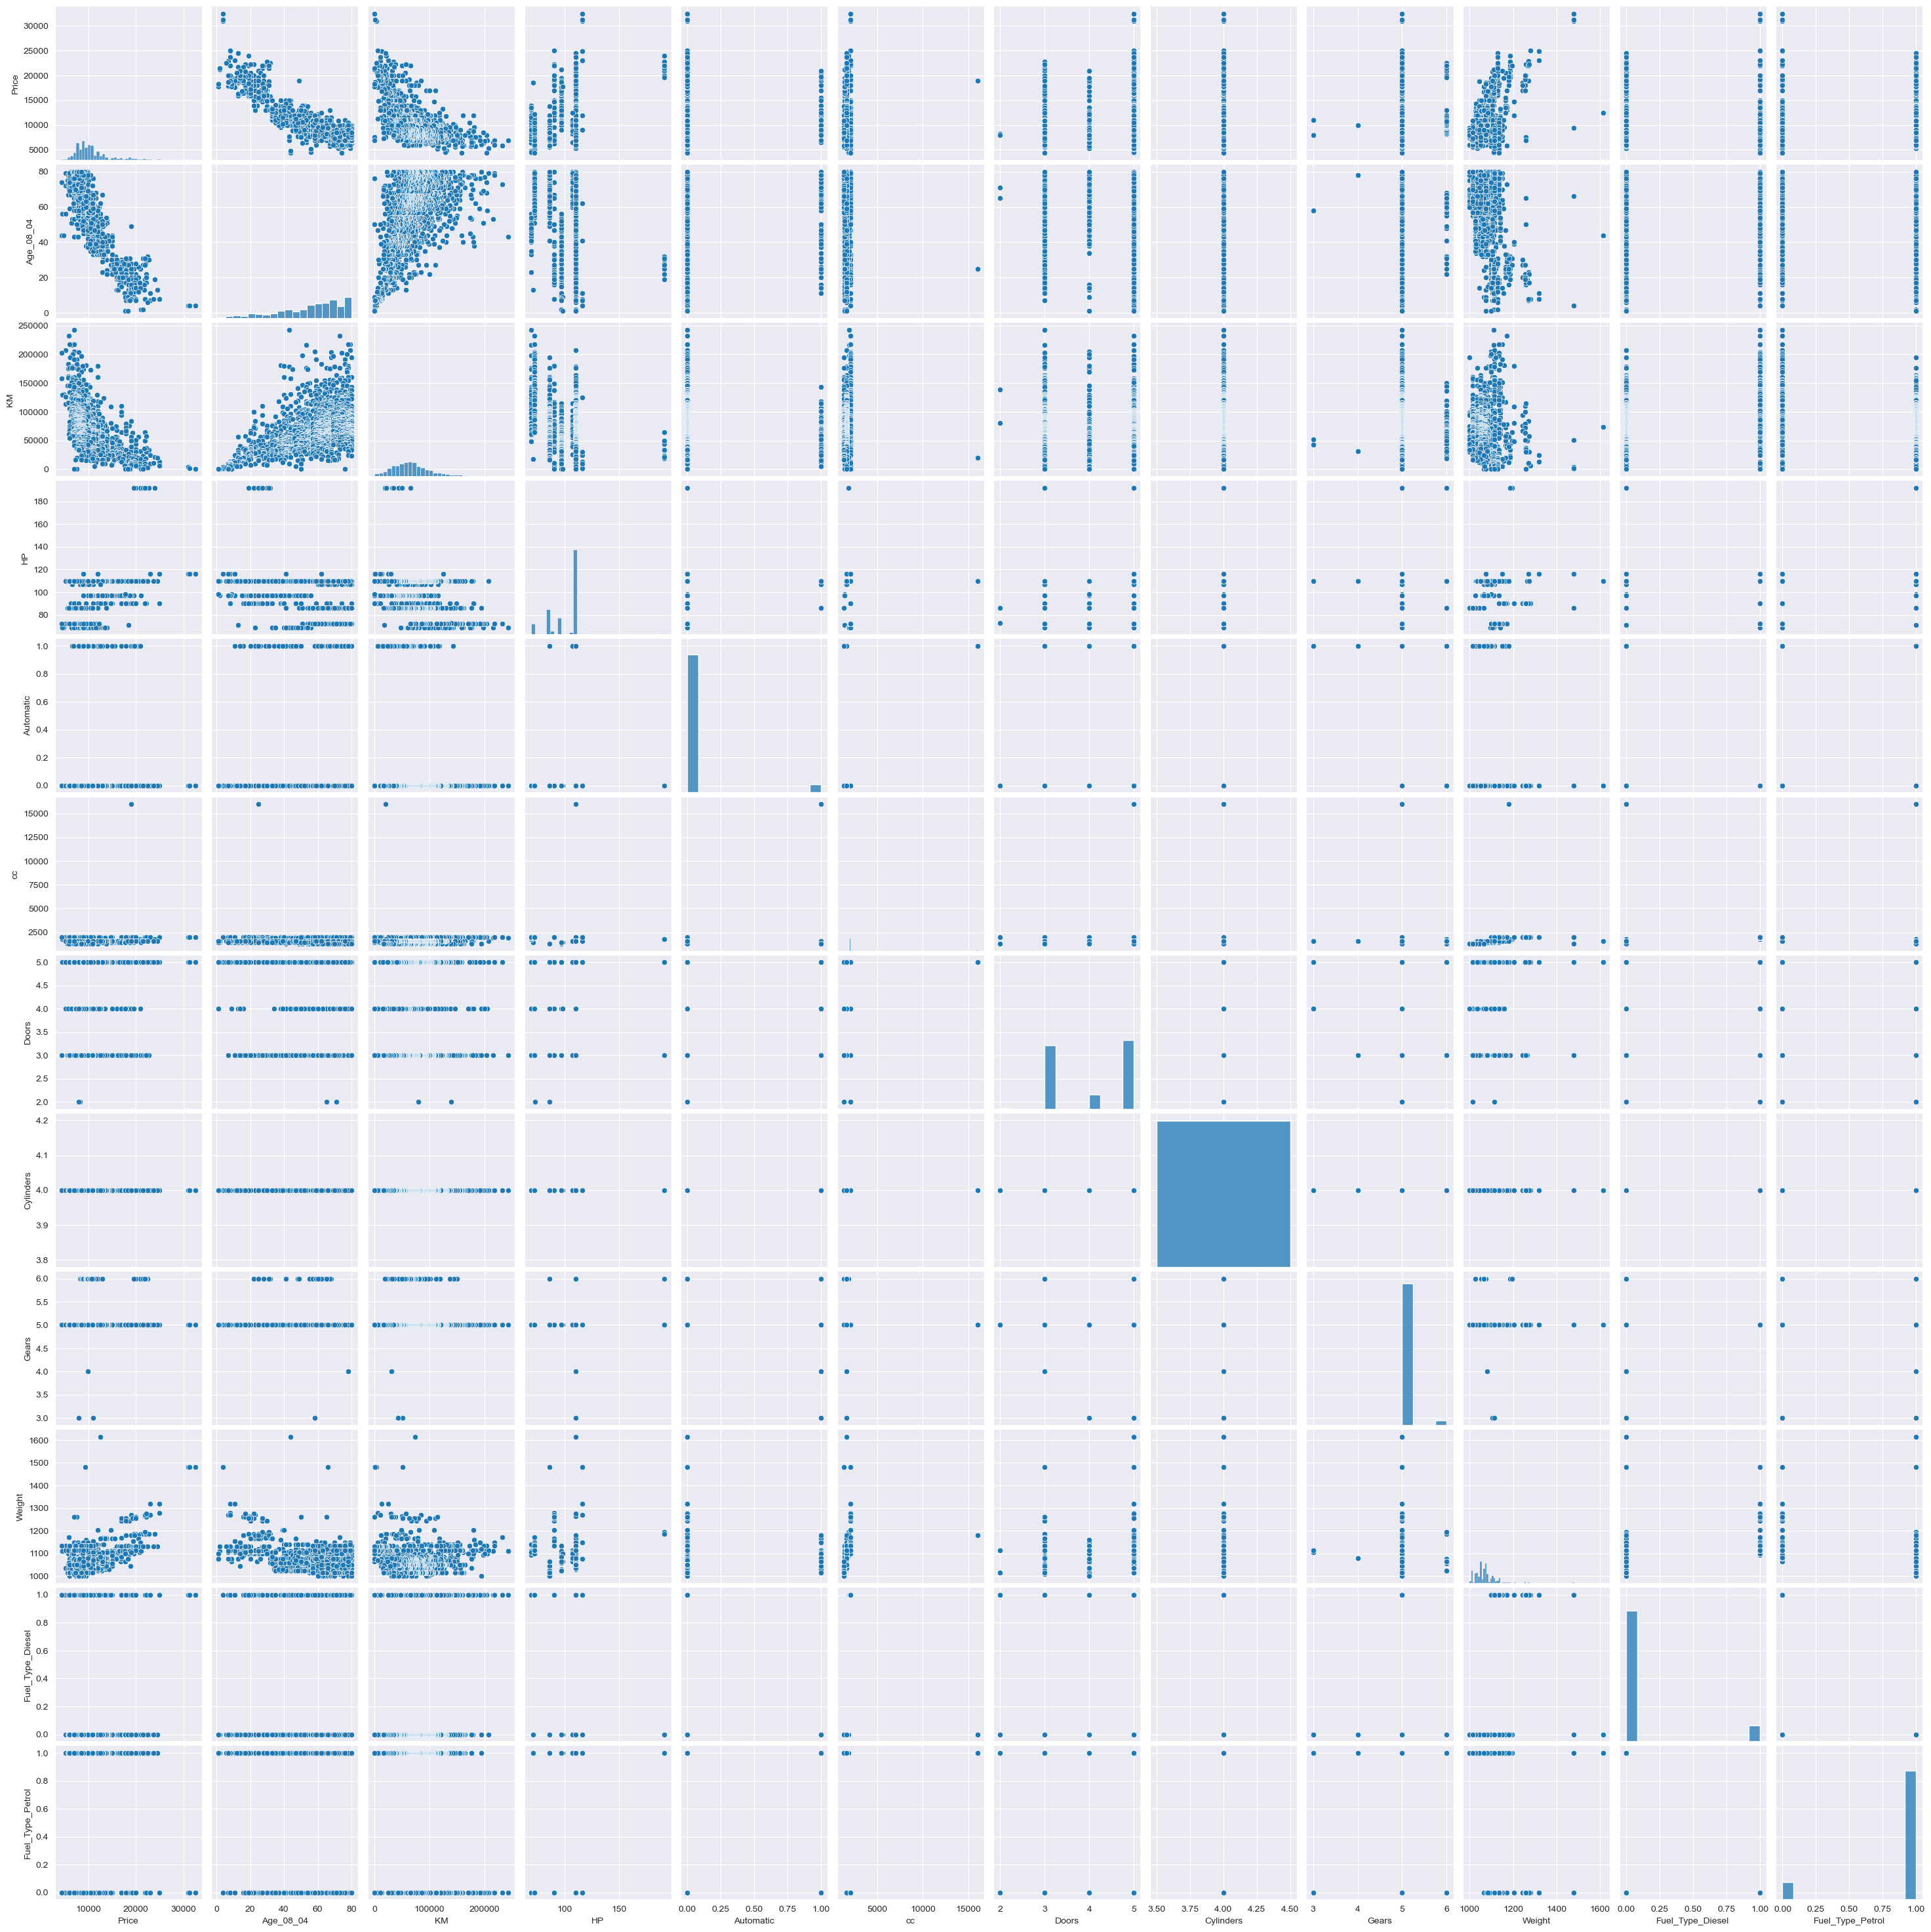

In [6]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [7]:
# statistical summary
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000,1436.000000,1436.000000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961,0.107939,0.880223
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112,0.310411,0.324814
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000,0.000000,0.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000,0.000000,1.000000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000,0.000000,1.000000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000,0.000000,1.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000,1.000000,1.000000


## Visualisation -

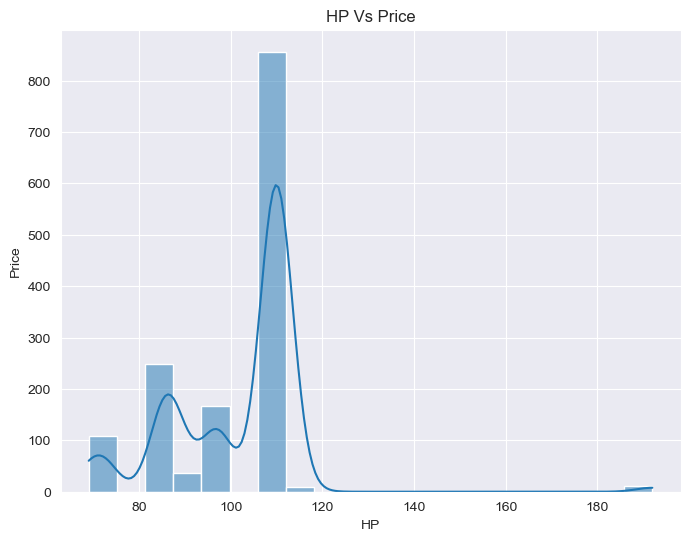

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['HP'], bins=20, kde=True)
plt.title('HP Vs Price')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()


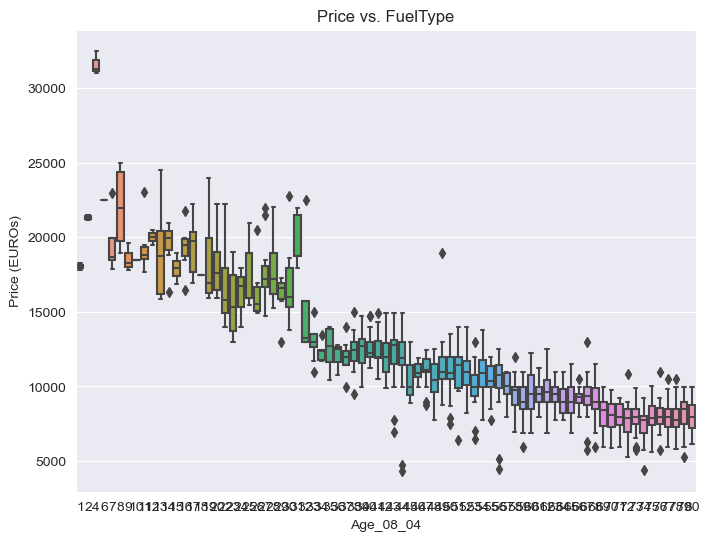

In [43]:
# Boxplot of Price vs. FuelType
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_08_04', y='Price', data=data)
plt.title('Price vs. FuelType')
plt.xlabel('Age_08_04')
plt.ylabel('Price (EUROs)')
plt.show()


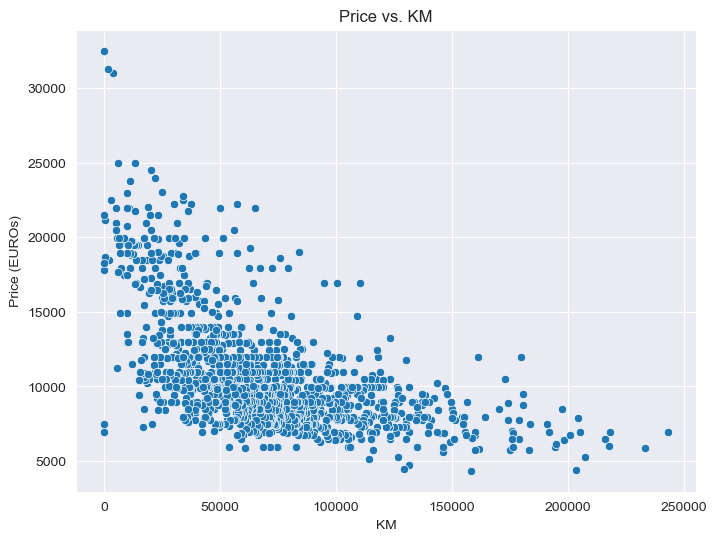

In [44]:
# Scatterplot of Price vs. KM
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM', y='Price', data=data)
plt.title('Price vs. KM')
plt.xlabel('KM')
plt.ylabel('Price (EUROs)')
plt.show()


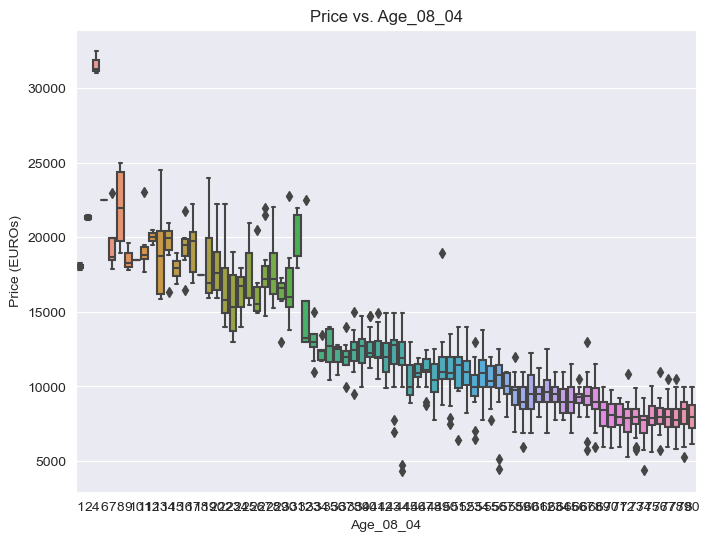

In [45]:
# Boxplot of Price vs. FuelType
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_08_04', y='Price', data=data)
plt.title('Price vs. Age_08_04')
plt.xlabel('Age_08_04')
plt.ylabel('Price (EUROs)')
plt.show()


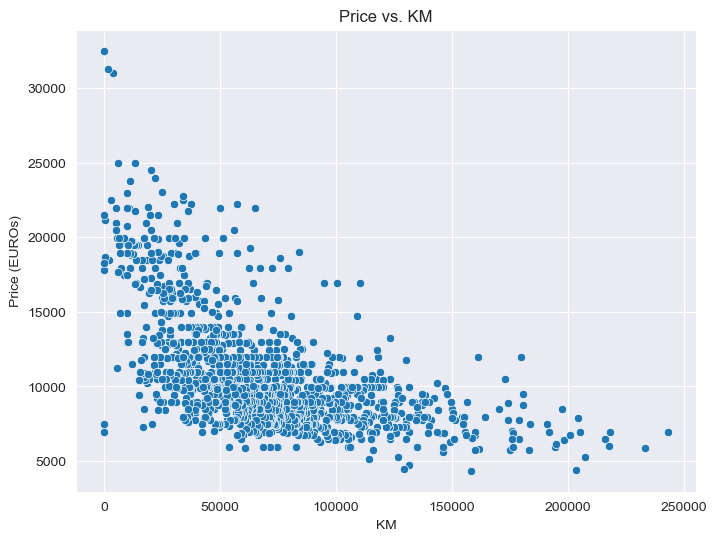

In [46]:
# Scatterplot of Price vs. KM
plt.figure(figsize=(8, 6))
sns.scatterplot(x='KM', y='Price', data=data)
plt.title('Price vs. KM')
plt.xlabel('KM')
plt.ylabel('Price (EUROs)')
plt.show()


## Models -

- Test for Normality of Residuals (Q-Q Plot)
- Residual Vs Regression
- Residual Plot for Homoscedasticity
- High Influence points
- Detecting Outliers

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('ToyotaCorolla - MLR.csv')

# Display the first few rows of the dataframe
data.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [29]:
# Select relevant columns for the regression model
# Assume the dataset has relevant features and the target variable 'Price'
# Modify the column names and selection based on our actual dataset

columns = ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',  'Weight', 'Price']
data = data[columns]

# Handle any missing values
data = data.dropna()


In [30]:
# Split the data into features and target variable
X = data.drop('Price', axis=1)
y = data['Price']


In [31]:
# Add a constant to the model (for the intercept term)
X = sm.add_constant(X)


In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


- Build the Multiple Linear Regression Model

In [33]:
# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Make predictions
predictions = model.predict(X_test)

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1047.
Date:                Sat, 25 May 2024   Prob (F-statistic):               0.00
Time:                        18:38:08   Log-Likelihood:                -9884.4
No. Observations:                1148   AIC:                         1.978e+04
Df Residuals:                    1140   BIC:                         1.983e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8223.9715   1458.590     -5.638      0.0

- Test for Normality of Residuals (Q-Q Plot)

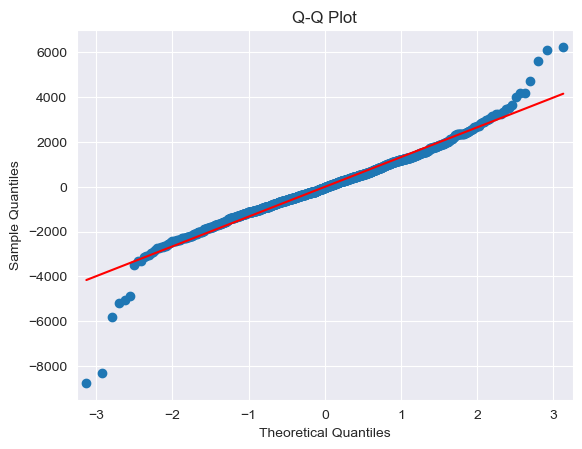

In [34]:
# Q-Q Plot
sm.qqplot(model.resid, line='s')
plt.title('Q-Q Plot')
plt.show()


 - Residuals vs Fitted Values

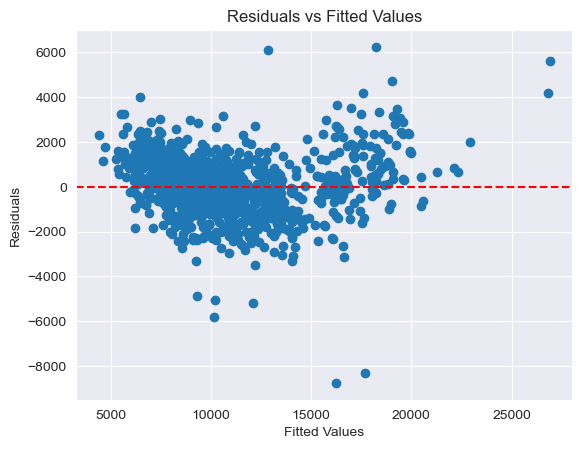

In [35]:
# Residuals vs Fitted Values Plot
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


- Residual Plot for Homoscedasticity

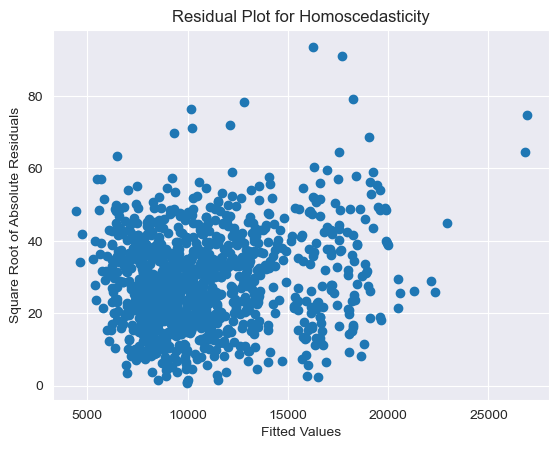

In [36]:
# Residual Plot for Homoscedasticity
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()


- High Influence Points (Cook's Distance)

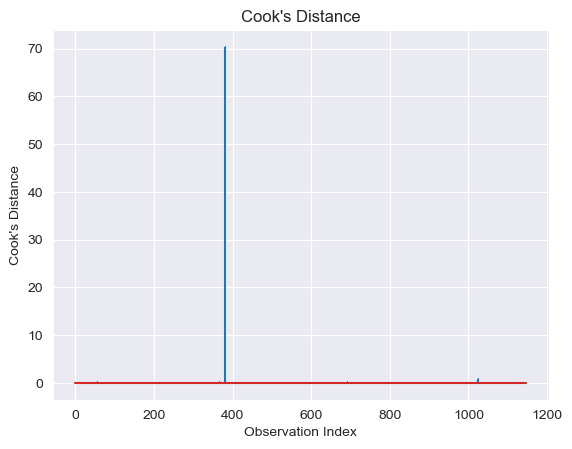

      dfb_const  dfb_Age_08_04    dfb_KM    dfb_HP     dfb_cc  dfb_Doors  \
1426   0.077492       0.069885 -0.047765  0.042955  -0.000712  -0.069574   
179    0.018325      -0.118721 -0.026554  0.000959  -0.008531   0.046549   
109   -0.746177       0.356260 -0.358493 -0.007061  -0.239660  -0.195956   
147    0.021185      -0.216636 -0.012912  0.023900  -0.025603   0.094605   
178    0.013465      -0.101359 -0.025005  0.001650  -0.008284   0.042313   
171    0.026913      -0.183831 -0.020693  0.009939  -0.015875   0.071639   
730   -0.117441       0.009459  0.002569 -0.009081   0.000531  -0.005994   
654    0.339362      -0.269021  0.047181  0.059547   0.064539   0.263084   
1054  -0.015857       0.000088  0.141921 -0.077437   0.037285  -0.002421   
2      0.023519       0.034807  0.034755  0.059172  -0.024270   0.096047   
523   -0.033155       0.033311 -0.050863  0.077795  -0.026058  -0.197284   
110   -0.552094       0.257258 -0.252815 -0.000749  -0.179305  -0.145720   
52    -0.070

In [37]:
# Cook's Distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

# Plot Cook's Distance
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance')
plt.show()

# High Influence Points
influence_summary = influence.summary_frame()
high_influence_points = influence_summary[influence_summary['cooks_d'] > 4/(X_train.shape[0] - X_train.shape[1] - 1)]
print(high_influence_points)


- Detecting Outliers

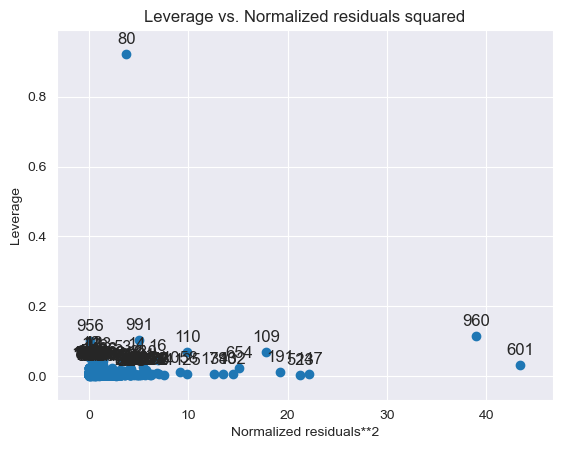

     student_resid       unadj_p       bonf(p)
109       4.391106  1.232645e-05  1.415077e-02
147       4.744866  2.351126e-06  2.699093e-03
523       4.642270  3.846277e-06  4.415526e-03
80        7.054036  3.010378e-12  3.455914e-09
191      -4.431381  1.026616e-05  1.178555e-02
601      -6.805158  1.628114e-11  1.869075e-08
960      -6.744839  2.431380e-11  2.791225e-08


In [38]:
# Leverage vs Studentized Residuals plot
from statsmodels.graphics.regressionplots import plot_leverage_resid2
plot_leverage_resid2(model)
plt.show()

# Outlier Test
outlier_test = model.outlier_test()
outliers = outlier_test[outlier_test['bonf(p)'] < 0.05]
print(outliers)


## Split the dataset into training and testing sets -

In [8]:

from sklearn.model_selection import train_test_split

X = data.drop(columns=['Price'])
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build 3 different models (depending upon various factors)

- Model 1 :

In [9]:
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Gears',data=data).fit()

In [10]:
# 1.depending upon factors which are negatively correlated (Age_08_04,KM)
model_1 = smf.ols('Price~Age_08_04+KM',data=data).fit()

In [11]:
#Coefficients
model_1.params

Intercept    20483.113534
Age_08_04     -154.149180
KM              -0.016461
dtype: float64

In [12]:
#t and p-Values
print(model_1.tvalues, '\n', model_1.pvalues)

Intercept    146.258516
Age_08_04    -56.334219
KM           -12.130199
dtype: float64 
 Intercept    0.000000e+00
Age_08_04    0.000000e+00
KM           2.636340e-32
dtype: float64


In [13]:
#R squared values
(model_1.rsquared,model_1.rsquared_adj)

(0.789976321405393, 0.7896831969411995)

- Model 2 :

In [14]:
# 2.depending upon factors  (KP,HP,cc,Weight,Gears)

model_2 = smf.ols('Price~KM+HP+cc+Weight+Gears',data=data).fit()

In [15]:
#Coefficients
model_2.params

Intercept   -33258.881334
KM              -0.050912
HP              19.487654
cc              -0.099806
Weight          38.719384
Gears          822.299558
dtype: float64

In [16]:
#t and p-Values
print(model_2.tvalues, '\n', model_2.pvalues)

Intercept   -17.567794
KM          -31.475924
HP            4.723669
cc           -0.700576
Weight       33.850160
Gears         2.672339
dtype: float64 
 Intercept     1.037046e-62
KM           1.150523e-165
HP            2.543950e-06
cc            4.836816e-01
Weight       5.738318e-185
Gears         7.618056e-03
dtype: float64


In [17]:
#R squared values
(model_2.rsquared,model_2.rsquared_adj)

(0.653263988756688, 0.652051625081012)

- Model 3 :

In [18]:
# 3.depending on all other factors (Age_08_04,KP,HP,cc,Doors,Weight,Gears)
model_3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Gears',data=data).fit()

In [19]:
#Coefficients
model_3.params

Intercept   -7116.713686
Age_08_04    -122.234520
KM             -0.019867
HP             28.480905
cc             -0.088120
Doors         -10.679443
Weight         18.854232
Gears         620.416571
dtype: float64

In [20]:
#t and p-Values
print(model_3.tvalues, '\n', model_3.pvalues)

Intercept    -5.395759
Age_08_04   -46.725228
KM          -16.344309
HP           10.878217
cc           -0.982650
Doors        -0.266951
Weight       21.781234
Gears         3.142596
dtype: float64 
 Intercept     7.978310e-08
Age_08_04    5.524482e-290
KM            3.531345e-55
HP            1.556180e-26
cc            3.259461e-01
Doors         7.895455e-01
Weight        4.742165e-91
Gears         1.708992e-03
dtype: float64


In [21]:
#R squared values
(model_3.rsquared,model_3.rsquared_adj)

(0.8628951602234526, 0.8622230776755283)

## Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset -

In [22]:
R_squared_values=(model_1.rsquared,model_2.rsquared,model_3.rsquared)
print(f'R_squared_values :',R_squared_values)

R_squared_values : (0.789976321405393, 0.653263988756688, 0.8628951602234526)


In [23]:
# we got that the highest R squared value is of model 3

# Hence we got that model 3 is the best fit among them

## Apply Lasso and Ridge methods on the model -

In [25]:
# Apply Lasso and Ridge methods



from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score


lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)

lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso MSE: {mse_lasso}")
print(f"Ridge MSE: {mse_ridge}")

Lasso MSE: 2202270.2600246826
Ridge MSE: 2202732.2441678946
